# Linear Algebra

This will cover linear algebra - a branch of mathematics you will make extensive use of in your degree. We will show how some linear algebra concepts can be implemented in python using `numpy`.

We will cover the following:
* Vectors & matrices in `numpy`
* Dot products
* Cross products
* Matrix multiplication
* Matrix inversion
* Eigendecomposition
* Singular Value Decomposition

First, let's import the libraries we'll be using in this notebook:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

As we covered briefly in the numpy notebook, vectors and matrices are represented in numpy as arrays of the right dimensions.

In [12]:
vector = np.array([1,2,3])
matrix = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

You could implement the dot and cross products yourself in code:

In [40]:
def my_dot_product(a, b):
    return np.sum(a * b)

def my_cross_product(a, b):
    return np.array([a[1]*b[2] - a[2]*b[1], a[2]*b[0] - a[0]*b[2], a[0]*b[1] - a[1]*b[0]])

# The dot product of a vector with itself is its length squared:
print(my_dot_product(vector, vector))

# The cross product of any vector with itself is always the zero vector:
print(my_cross_product(vector, vector))

14
[0 0 0]


But thankfully numpy has functions implementing these already:

In [41]:
print(np.dot(vector, vector))
print(np.cross(vector, vector))

14
[0 0 0]


### Exercise: Dot products and cosines

One very useful property of the dot product allows us to find the angle between two vectors. For two vectors a and b,

dot(a, b) = ||a|| ||b|| cos(theta)

Here, ||a|| is the length of the vector a.

This property is so fundamental that it's considered an [alternative definition of the dot product](https://en.wikipedia.org/wiki/Dot_product#Geometric_definition). It is widely used in lighting calculations for computer graphics.

Use this property to find the angle between the two vectors (1,2,3) and (-3, 2, -1). You'll probably want to make use of the inverse cosine function (also known as arcos), which in numpy is `np.arccos()`.

In [ ]:
vector_a = np.array([1,2,3])
vector_b = np.array([-3,2,-1])

# Work out angle between these vectors, and print it.
# Your code here...

## Cross product

Recall that the cross product of two vectors is another vector perpendicular to both, following the [right-hand rule](https://en.wikipedia.org/wiki/Right-hand_rule).

This property is also widely used in computer graphics, where it is common to need a vector perpendicular to a triangle (the "normal" vector).

Below a cross product is calculated, and the 3 vectors are plotted using matplotlib's 3D plotting. Try changing `vector_a` and `vector_b` and seeing how the result changes. When setting these values, try using the right hand rule to predict the orientation of the blue line, and see if your prediction is correct.

Text(0.5, 0.92, 'Two vectors (red, green) and their cross product (blue)')

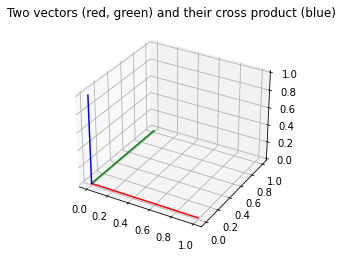

In [4]:
vector_a = np.array([1,0,0])
vector_b = np.array([0,1,0])

cross_product = np.cross(vector_a, vector_b)

def plot_vector(vector, axes, color):
    x_vals = np.array([0, vector[0]])
    y_vals = np.array([0, vector[1]])
    z_vals = np.array([0, vector[2]])
    axes.plot(x_vals, y_vals, z_vals, color)

axes = plt.axes(projection='3d')

plot_vector(vector_a, axes, "r")
plot_vector(vector_b, axes, "g")
plot_vector(cross_product, axes, "b")
plt.title("Two vectors (red, green) and their cross product (blue)")
    

### Exercise: Cross Product and Parallelograms

Another property of the cross product of vectors a and b is that its magnitude (i.e. length) is equal to that of a parallelogram with the vectors a and b as two of the sides, as shown in this diagram (from [wikipedia](https://en.wikipedia.org/wiki/Cross_product#/media/File:Cross_product_parallelogram.svg))

![Diagram](https://upload.wikimedia.org/wikipedia/commons/4/4e/Cross_product_parallelogram.svg)

I'd like you to verify this for the vectors a and b below. Do this by dividing the parallelogram into two triangles, and working out the area of each. The length of the sides of these triangles will be ||a||, ||b|| and ||b - a||. To work out their area you may want to make use of [Heron's formula](https://en.wikipedia.org/wiki/Heron%27s_formula).

In [10]:
vector_a = np.array([1,2,3])
vector_b = np.array([-3,2,-1])

cross_product = np.cross(vector_a, vector_b)
cross_area = np.linalg.norm(cross_product) # This function works out the norm, i.e. the length of the vector in this case.

print("Area estimated with cross product", cross_area)

# Work out the lengths of the 3 sides of the triangle
# Find the area of each triangle using heron's formula
# Double to get the parallelogram area.
# Your code here (replace this line)...
triangle_area = 0.0

## This should be the same as cross_area above.
print("Area estimated by finding triangle areas", triangle_area)

Area estimated with cross product 13.856406460551018
Area estimated by finding triangle areas 0.0


## Mathematical Operators and Matrix Multiplication

As a reminder, all the standard mathematical operators in numpy `+ - * /` work **element-wise**. This means that `+` is vector addition, but `*` is **not** matrix multiplication.

To do matrix multiplication you must use the `np.matmul()` function or the `@` operator (these do the same thing).

In [13]:
another_vector = np.array([4, 5, 6])
vector_sum = vector + another_vector # This works fine, and does vector addition as you would expect
print("Sum of the vectors:", vector_sum)

multiple = matrix * vector # This does not do matrix multiplication
# This will use numpy's "broadcasting" feature, and make copies of the vector to make it a 3x3 matrix.
# Then it will multiply both together, giving a 3x3 result
print("Broadcasted element-wise multiply:\n", multiple)

# To do real matrix multiplication, use np.matmul()
matrix_multiply = np.matmul(matrix, vector)
print("Proper matrix multiplication, giving a 3-vector:", matrix_multiply)
# You can also use the @ operator, which does the same thing
matrix_multiply = matrix @ vector
print("Proper matrix multiplication, giving a 3-vector:", matrix_multiply)

Sum of the vectors: [5 7 9]
Broadcasted element-wise multiply:
 [[1 0 0]
 [0 2 0]
 [0 0 3]]
Proper matrix multiplication, giving a 3-vector: [1 2 3]
Proper matrix multiplication, giving a 3-vector: [1 2 3]


Numpy can also invert a matrix for you:

In [46]:
matrix = np.random.rand(3,3)

matrix_inverse = np.linalg.inv(matrix)

# When multiplying the matrix by its inverse, the result should be close to the identity matrix
# It won't be exactly the same due to floating point errors
multiple = np.matmul(matrix_inverse, matrix)
print("Multiplication of matrix with its inverse:\n", multiple)
# It's really really close though, those non-diagonal entries are in the order of 10**-17.

# Because it's not exactly the identity, this test won't work:
print("Bad test for equality:", np.all(multiple == np.eye(3)))

# If you want to check if one numpy array is "close enough" to another, you can use np.allclose():
print("Good test for equality:", np.allclose(np.matmul(matrix, matrix_inverse), np.eye(3)))


Multiplication of matrix with its inverse:
 [[ 1.00000000e+00 -2.07850389e-16  4.33108961e-16]
 [ 1.42311088e-16  1.00000000e+00  3.78593168e-16]
 [-2.35269174e-16 -6.72015753e-16  1.00000000e+00]]
Bad test for equality: False
Good test for equality: True


You can only invert square matrices, so the following won't work:

In [44]:
matrix = np.random.rand(2,3)
matrix_inverse = np.linalg.inv(matrix) # This throws LinAlgError as the input isn't square.

LinAlgError: Last 2 dimensions of the array must be square

Also, as covered in the course, not all square matrices are invertible. The matrix below is not invertible because its rows are not linearly independent (row 1 is just two times row 0).

As such the matrix is *singular* and can't be inverted. Trying to invert it will give a `LinAlgError` that will inform you the matrix is singular:

In [ ]:
matrix = np.array([[1, 0], [2, 0]])
matrix_inv = np.linalg.inv(matrix)
print(matrix_inv)

LinAlgError: Singular matrix

In the course you discussed decomposition of a matrix into eigenvalues and eigenvectors, the *eigendecomposition*.

Numpy can simply compute the eigenvectors and eigenvalues of any *diagonalisable* square matrix for you:

In [ ]:
# Let's start with a simple example:
matrix = np.array([
    [1, 0, 0], 
    [0, 2, 0], 
    [0, 0, 3]])

# The eig function returns first an array containing the eigenvalues
# then a second array containing the eigenvectors
# For this matrix as you would expect the eigenvectors are 
eigen_decomp = np.linalg.eig(matrix)

print("Eigenvalues:", eigen_decomp[0])
print("Eigenvectors:\n", eigen_decomp[1])

Eigenvalues: [1. 2. 3.]
Eigenvectors:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Again, you can compute the eigenvalues of any *diagonalisable* square matrix.

This is a related concept to being *singular*, but not the same thing. For example, the following matrix is singular but is diagonalisable:

In [ ]:
singular_matrix = np.array([
    [1, 0],
    [0, 0]
])

# The eigendecomposition works fine:
print(np.linalg.eig(singular_matrix))

# But this will throw an error as the matrix is singular:
print(np.linalg.inv(singular_matrix))

(array([1., 0.]), array([[1., 0.],
       [0., 1.]]))


LinAlgError: Singular matrix

As we covered in the course, Singular Value Decomposition (SVD) is a more general matrix decomposition that works for any n by m matrix. Numpy can compute SVD of a matrix too:

In [ ]:
matrix = np.array([
    [0, 1],
    [1, 2],
    [2, 3]
])

u, s, vt = np.linalg.svd(matrix)
print("U:\n", u)
print("Sigma:", s)
print("Vt:\n", vt)

# Note that the "Sigma" is returned as a vector rather than a matrix, so we can't just multiply
# U * Sigma * Vt to get the original matrix back.

# s is a vector containing the "diagonal entries" of the Sigma matrix.

# We need to convert Sigma into a 3x2 matrix first:
sigma = np.zeros((u.shape[1], s.shape[0]))
for i in range(s.shape[0]):
    sigma[i, i] = s[i]

print("Sigma (matrix):\n", sigma)

# Now we can reconstruct the original matrix by multiplying
# I'm using np.dot() here, this does the same thing as np.matmul() in this case.
reconstruction = np.dot(u, np.dot(sigma, vt))

print("Reconstruction:\n", reconstruction)

# We can check it's "close enough" to the original matrix with np.allclose():
if np.allclose(reconstruction, matrix):
    print("Reconstruction is close enough to original matrix.")
else:
    print("Uh oh - reconstruction is not close enough to original matrix.")

U:
 [[-0.19972938  0.89075334  0.40824829]
 [-0.51626998  0.25845432 -0.81649658]
 [-0.83281059 -0.37384469  0.40824829]]
Sigma: [4.3218954  0.56676285]
Vt:
 [[-0.5048459  -0.86320949]
 [-0.86320949  0.5048459 ]]
Sigma (matrix):
 [[4.3218954  0.        ]
 [0.         0.56676285]
 [0.         0.        ]]
Reconstruction:
 [[-5.55111512e-17  1.00000000e+00]
 [ 1.00000000e+00  2.00000000e+00]
 [ 2.00000000e+00  3.00000000e+00]]
Reconstruction is close enough to original matrix.


## Further Reading

You will cover more on linear algebra in your computer graphics and geometry courses. For more information on numpy's linear algebra functionality, check the [documentation here](https://numpy.org/doc/stable/reference/routines.linalg.html).

If you find that numpy does not have a function you require, scipy is a more complete library with many more linear algebra functions (see [documentation here](https://docs.scipy.org/doc/scipy/reference/linalg.html)).